In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="transformers")


In [2]:
df = pd.read_csv("C://Users//chuen//Music//spacy & nltk//project nlp//Reviews.csv")

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.shape

(568454, 10)

In [5]:
df = df.head(1000)

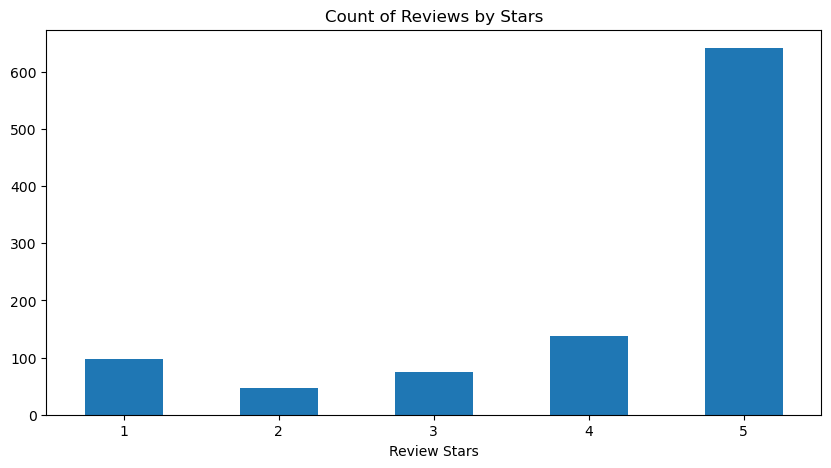

In [6]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.xticks(rotation=0) 
plt.show()

## Model

In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [8]:
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

In [9]:
manual_max_length = 512

In [12]:
results = []
for text in df['Text']:  
    
    encoded_input = tokenizer(
        text, 
        return_tensors='pt', 
        truncation=True,     
        padding=True,       
        max_length=manual_max_length  
    )

    output = model(**encoded_input)
    scores = softmax(output.logits.detach().numpy()[0]) 
    

    labels = ["Negative", "Neutral", "Positive"]
    sentiment = labels[scores.argmax()]
    score = scores.max()
    
    results.append({'text': text, 'sentiment': sentiment, 'score': score})

In [13]:
result_df = pd.DataFrame(results)
result_df

,text,sentiment,score
0,I have bought several of the Vitality canned d...,Positive,0.940395
1,Product arrived labeled as Jumbo Salted Peanut...,Negative,0.508986
2,This is a confection that has been around a fe...,Positive,0.898704
3,If you are looking for the secret ingredient i...,Positive,0.907486
4,Great taffy at a great price. There was a wid...,Positive,0.988063
...,...,...,...
995,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...,Positive,0.992553
996,"Man what can i say, this salsa is the bomb!! i...",Positive,0.981274
997,this sauce is so good with just about anything...,Positive,0.987266
998,Not hot at all. Like the other low star review...,Negative,0.661606


In [14]:
df["Text"][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [15]:
df["Text"][1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

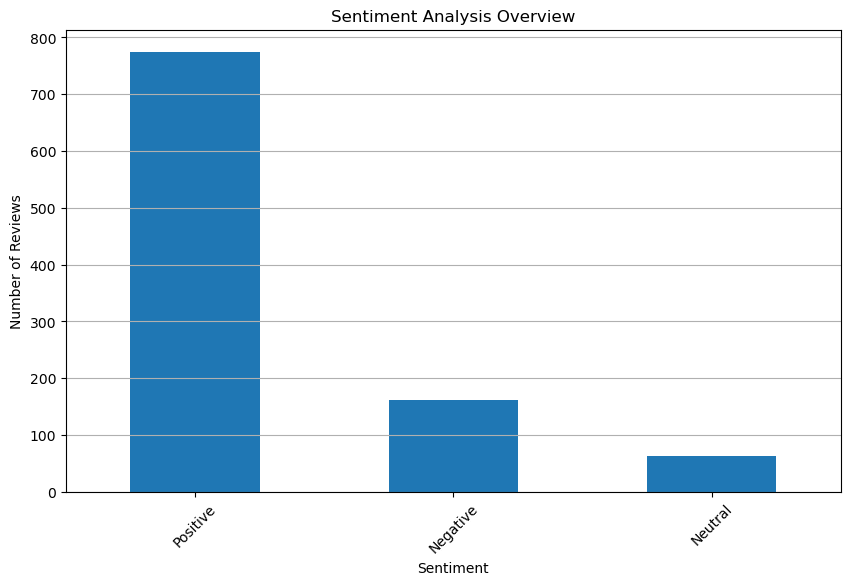

In [16]:
plt.figure(figsize=(10, 6))
result_df['sentiment'].value_counts().plot(kind='bar')


plt.title('Sentiment Analysis Overview')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')

## test predict new text

In [17]:
new_text = "This product is not bad."


encoded_input = tokenizer(
    new_text,
    return_tensors='pt',
    truncation=True,       
    padding=True,         
    max_length=512        
)
output = model(**encoded_input)
scores = softmax(output.logits.detach().numpy()[0])
labels = ["Negative", "Neutral", "Positive"]

predicted_sentiment = labels[scores.argmax()]
confidence_score = scores.max()

print(f"Text: {new_text}")
print(f"Predicted Sentiment: {predicted_sentiment}")
print(f"Confidence Score: {confidence_score:.2f}")

Text: This product is not bad.
Predicted Sentiment: Positive
Confidence Score: 0.80
